# Syed Farhan Alam Zaidi
# 2018210031
# Assignment 11
Github Link: https://github.com/farhan-93/assignment11.git
## Image Denoising


Change the given picture due to Memory Error. I used picture of size 80by80

Import Some required libraries

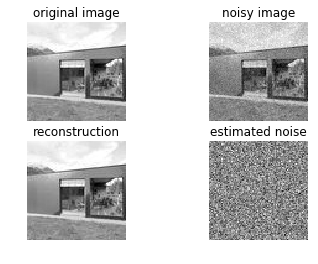

In [777]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import signal
from skimage import io, color
from skimage import exposure

file_image	= 'cau-8.jpg'

im_color 	= io.imread(file_image)
im_gray  	= color.rgb2gray(im_color)
im          = (im_gray - np.mean(im_gray)) / np.std(im_gray)
(row, col)  = im.shape

noise_std   = 0.2 # try with varying noise standard deviation
noise       = np.random.normal(0, noise_std, (row, col))
im_noise    = im + noise

# obtain the reconstructed (denoised) images with varying degrees of regularization 

im_recon    = im # this must be replaced with the reconstructed (denoised) image 
noise_recon = im_noise - im_recon
error       = np.linalg.norm(im - im_recon)

p1 = plt.subplot(2,2,1)
p1.set_title('original image')
plt.imshow(im, cmap='gray')
plt.axis('off')

p2 = plt.subplot(2,2,2)
p2.set_title('noisy image')
plt.imshow(im_noise, cmap='gray')
plt.axis('off')

p3 = plt.subplot(2,2,3)
p3.set_title('reconstruction')
plt.imshow(im_recon, cmap='gray')
plt.axis('off')

p4 = plt.subplot(2,2,4)
p4.set_title('estimated noise')
plt.imshow(noise_recon, cmap='gray')
plt.axis('off')

plt.show()

Function that denoise the image by least squares method.
Use the Scipy.sparse for memory management.

In [2]:
def leastsquare_denoise(im2,Dx,Dy,lamb):    
    I=sp.sparse.identity(row*col)
    I=sp.sparse.csr_matrix(I)
    zeroX=sp.sparse.csc_matrix((1,row*col-row))
    zeroy=sp.sparse.csc_matrix((1,row*col-col))

    ############### Creating Block Matrix (The matrix A for |AX-B|^2)
    A=sp.sparse.bmat([[I,np.sqrt(lamb)*Dx.T,np.sqrt(lamb)*Dy]]).toarray()
    ############### Taking dot product of A and transpose of A
    Ai=A.dot(A.T)
    ############### convert above matrix into Sparse Matrix
    Ain=sp.sparse.csc_matrix(Ai)
    ############## Taking inverse of A.A^T
    Ainn=sp.sparse.linalg.inv(Ain)
    ############## Making Block matrix B for |AX-B|^2
    B=sp.sparse.bmat([[im2,zeroX,zeroy]]).toarray()
    ############## reshape the B matrix into (m,)
    B=B.reshape((-1,))
    ############## Taking dot product of A and B
    right=A.dot(B)
    ############## Convert above result in Sparse Matrix
    right=sp.sparse.csc_matrix(right)
    ############## reshape the right matrix into (m,)
    right=right.reshape((-1,))
    ############## Dot product of Ainn and right to calculate the Least square
    lest=Ainn.dot(right.T)
    u=lest.reshape((row, col))
    u=u.toarray()
    u=np.asarray(u)
    ############## return reconstructed image
    return u

Generate the Differential operator Matrix for X-axis

In [779]:
rows=row*col-row
cols=row*col
Dx=np.zeros((rows,cols))

i = 0
#j=rows+1
while i < rows:
    j=i+row
    Dx[i][j] = 1
    Dx[i][i] = -1
    i=i+1
Dx=sp.sparse.csr_matrix(Dx)

Generate the Differential operator Matrix for y-axis

In [780]:
rows=row*col
cols=row*col-col
Dy=np.zeros((rows,cols))

r=0
for i in range(0,cols-1):
    if (i-1)%col==0 and i==0:
        Dy[i][i]=-1
        Dy[i+1][i]=1
    else:
        Dy[i+r][i]=-1
        Dy[i+r+1][i]=1
    
    if (i-1)%col==0 and i!=0:
        r+=1
Dy=sp.sparse.csr_matrix(Dy)

convert Noisy image into sparse matrix

In [781]:
im2=im_noise.reshape(row*col)
im2=sp.sparse.csr_matrix(im2)

Call the function in loop for trying various lambda values

Index No lambda Value = Calculated Error
0 (2** -10 ) = 16.008991566261344


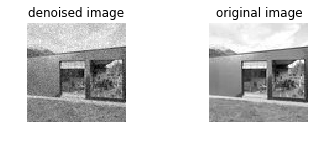

Index No lambda Value = Calculated Error
1 (2** -9 ) = 15.948890699266682


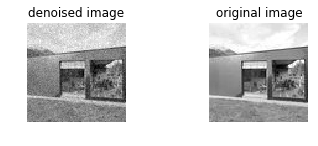

Index No lambda Value = Calculated Error
2 (2** -8 ) = 15.831376642886088


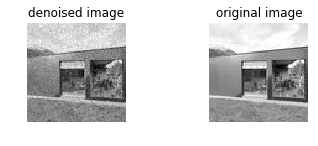

Index No lambda Value = Calculated Error
3 (2** -7 ) = 15.606727729429927


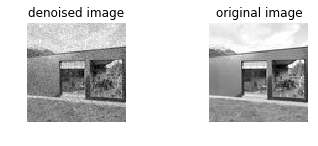

Index No lambda Value = Calculated Error
4 (2** -6 ) = 15.196202075370831


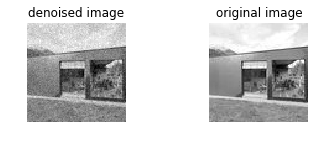

Index No lambda Value = Calculated Error
5 (2** -5 ) = 14.511313353059284


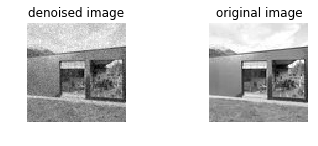

Index No lambda Value = Calculated Error
6 (2** -4 ) = 13.569703648856178


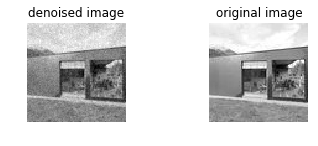

Index No lambda Value = Calculated Error
7 (2** -3 ) = 12.79305054289691


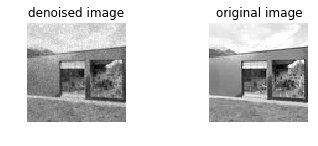

Index No lambda Value = Calculated Error
8 (2** -2 ) = 13.209867788201487


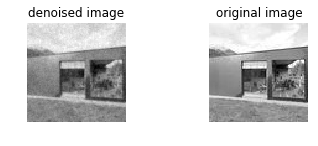

Index No lambda Value = Calculated Error
9 (2** -1 ) = 15.615403675099106


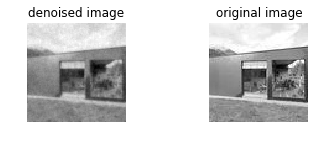

Index No lambda Value = Calculated Error
10 (2** 0 ) = 19.596430756136343


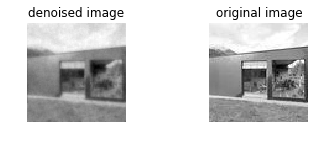

Index No lambda Value = Calculated Error
11 (2** 1 ) = 24.295937656428684


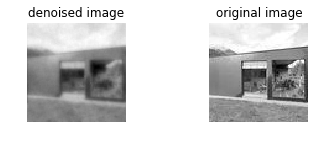

Index No lambda Value = Calculated Error
12 (2** 2 ) = 29.13576862424641


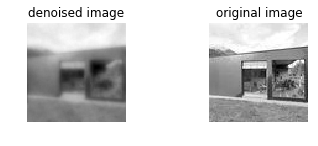

Index No lambda Value = Calculated Error
13 (2** 3 ) = 33.80108531928881


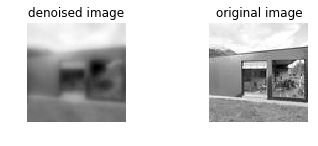

Index No lambda Value = Calculated Error
14 (2** 4 ) = 38.1491042980455


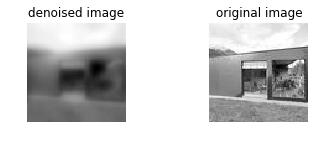

In [782]:
error_list=[]
count=-1 ##### for counting Lambda index
for i in range(-10,5):
    lamb=(2**i)
    u=leastsquare_denoise(im2,Dx,Dy,lamb)
    error1 = np.linalg.norm(im - u)
    error_list=np.append(error_list,error1)
    print("Index No","lambda Value","=","Calculated Error")
    count=count+1
    print(count,"(2**",i,") =",error1)
    
    p1 = plt.subplot(2,2,1)
    p1.set_title('denoised image')
    plt.imshow(u, cmap='gray')
    plt.axis('off')
    noise_recon = u - im
    
    p2 = plt.subplot(2,2,2)
    p2.set_title('original image')
    plt.imshow(im, cmap='gray')
    plt.axis('off')
    
    plt.show()
    

Generating Gaph for various lambda values against energy

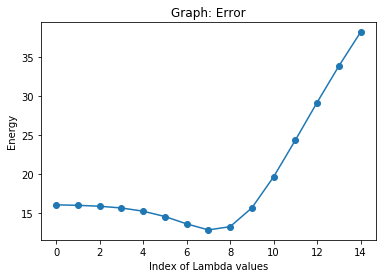

In [783]:
plt.figure(6)
plt.plot( error_list,"-o")

plt.title("Graph: Error");
plt.xlabel("Index of Lambda values")
plt.ylabel("Energy");
plt.show()

At below we can enter lambda manually and can check the error

In [784]:
lamb=0.1
u=leastsquare_denoise(im2,Dx,Dy,lamb)

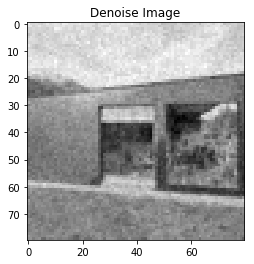

In [785]:
plt.title("Denoise Image")
plt.imshow(u,cmap='gray', interpolation='None')

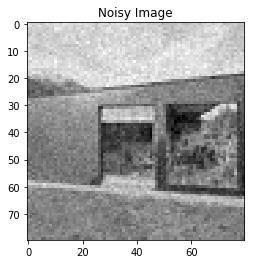

In [786]:
plt.title("Noisy Image")
plt.imshow(im_noise,cmap='gray', interpolation='None')

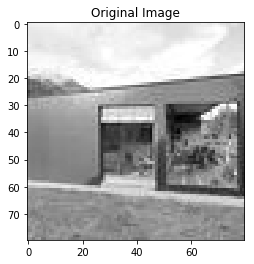

In [787]:
plt.title("Original Image")
plt.imshow(im,cmap='gray', interpolation='None')

In [788]:

error       = np.linalg.norm(im - u)

In [789]:
error

12.971766910496417